#Prepping table 1

In [ ]:
# first some initial setup of libraries we will be using
import pandas as pd # this is the main library used in python for manipulating data.
import json # this is a library to parse json (javascript object notation)
from urllib.request import urlopen # library to read data from a URL
import matplotlib.pyplot as plt # visualization library we will use that integrates with pandas

In [ ]:
# We are reading in the data we want from ACS 2021. The API returns json data. Try copy and pasting the link yourself in a browser to see what the raw data looks like.
url="https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19001_002E,B19001_017E&for=congressional%20district:*&in=state:*"

# store the response of URL
response = urlopen(url)

# storing the JSON response from url in data
data_json = json.loads(response.read())
data_json.pop(0) # the first row of data is header information which we don't need, so pop removes that from the dataset.

# Hand populate the columns based on the variable descriptions census.gov documents here:
# https://api.census.gov/data/2021/acs/acs1/variables.html. Note they correspond back to the variable names I included in the URL above.
cols = ['District Name','Total Households','Less than $10k', '$200k+', 'State code', 'district number']

acs_df = pd.DataFrame(data_json, columns = cols)

# time to do some basic cleanup of the data. We will need to extract the district number and state in a regular format so we can later join with the party data.
acs_df[['District', 'State']] = acs_df['District Name'].str.split(',', expand=True)
acs_df['district number'] = pd.to_numeric(acs_df['district number'])

acs_df['State'] = acs_df['State'].str.strip()


# Let's just keep the columns we need
acs_df = acs_df[['Total Households', 'Less than $10k', "$200k+", 'district number', 'State']]

# take a look at the top results in the dataset
acs_df.head()

,Total Households,Less than $10k,$200k+,district number,State
0,289474,14153,19390,10,Michigan
1,299804,23793,10899,4,Mississippi
2,278057,27728,19574,14,Michigan
3,306685,19036,12208,1,Michigan
4,285554,26481,12412,3,Mississippi


In [ ]:
# Convert the number columns into number data types so we can math on them
acs_df["Total Households"] = pd.to_numeric(acs_df["Total Households"])
acs_df["Less than $10k"] = pd.to_numeric(acs_df["Less than $10k"])
acs_df['$200k+'] = pd.to_numeric(acs_df['$200k+'])

# Compute some new columns based on the existing columns for later visualization
acs_df['% of households over $200k'] = (100*acs_df['$200k+'])/acs_df['Total Households']
acs_df['% of households less than $10k'] = (100*acs_df['Less than $10k'])/acs_df['Total Households']

# now let's look at the data again
acs_df.head()

,Total Households,Less than $10k,$200k+,district number,State,% of households over $200k,% of households less than $10k
0,289474,14153,19390,10,Michigan,6.698356,4.889213
1,299804,23793,10899,4,Mississippi,3.635375,7.936185
2,278057,27728,19574,14,Michigan,7.039564,9.972056
3,306685,19036,12208,1,Michigan,3.980632,6.207020
4,285554,26481,12412,3,Mississippi,4.346638,9.273552


In [ ]:
acs_df.dtypes

Total Households                    int64
Less than $10k                      int64
$200k+                              int64
district number                     int64
State                              object
% of households over $200k        float64
% of households less than $10k    float64
dtype: object

#Prepping table 2

In [ ]:
url_2="https://api.census.gov/data/2021/acs/acs1?get=NAME,B06009_001E,B06009_002E,B06009_003E,B06009_005E,B06009_006E&for=congressional%20district:*&in=state:*"


# store the response of URL
response_2 = urlopen(url_2)

# storing the JSON response from url in data
data_json_2 = json.loads(response_2.read())
data_json_2.pop(0) # the first row of data is header information which we don't need, so pop removes that from the dataset.

# Hand populate the columns based on the variable descriptions census.gov documents here:
# https://api.census.gov/data/2021/acs/acs1/variables.html. Note they correspond back to the variable names I included in the URL above.
cols = ['District Name','Total','< High School', 'High School Degree',
        'Bachelors Degree', 'Master Degree or Higher', 'State code', 'district number']

demo = pd.DataFrame(data_json_2, columns = cols)

In [ ]:
#Split District Name column into District and State columns and name by the "," and convert district number into numeric
demo[['District', 'State']] = demo['District Name'].str.split(',', expand=True)
demo['district number'] = pd.to_numeric(demo['district number'])

In [ ]:
#Remove any leading and trailing white spaces from the state column
demo['State'] = demo['State'].str.strip()

In [ ]:
#Keep only the columns we need
demo = demo[['Total', '< High School', 'High School Degree','Bachelors Degree', 'Master Degree or Higher', 'district number', 'State']]
demo.head()

,Total,< High School,High School Degree,Bachelors Degree,Master Degree or Higher,district number,State
0,513744,42787,166405,80176,46490,10,Michigan
1,526895,62401,152404,80317,45785,4,Mississippi
2,469769,50963,114527,86334,77535,14,Michigan
3,523063,33153,166663,89086,56238,1,Michigan
4,498425,60628,142709,85809,55977,3,Mississippi


In [ ]:
demo["Total"] = pd.to_numeric(demo["Total"])
demo["< High School"] = pd.to_numeric(demo["< High School"])
demo["High School Degree"] = pd.to_numeric(demo["High School Degree"])
demo["Bachelors Degree"] = pd.to_numeric(demo["Bachelors Degree"])
demo["Master Degree or Higher"] = pd.to_numeric(demo["Master Degree or Higher"])

<ipython-input-71-ebc579e29265>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-71-ebc579e29265>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-71-ebc579e29265>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-71-ebc579e29265>

In [ ]:
demo.dtypes

Total                      float64
< High School              float64
High School Degree         float64
Bachelors Degree           float64
Master Degree or Higher    float64
district number              int64
State                       object
dtype: object

In [ ]:
# Compute some new columns based on the existing columns for later visualization
demo['% of less than High School'] = (100*demo['< High School'])/demo['Total']
demo['% of High School Degree'] = (100*demo['High School Degree'])/demo['Total']
demo['% of Bachelors Degree'] = (100*demo['Bachelors Degree'])/demo['Total']
demo['% of Master Degree or Higher'] = (100*demo['Master Degree or Higher'])/demo['Total']

In [ ]:
merge_acs_demo = pd.merge(acs_df, demo, on=["State", "district number"])
merge_acs_demo.head()

,Total Households,Less than $10k,$200k+,district number,State,% of households over $200k,% of households less than $10k,Total,< High School,High School Degree,Bachelors Degree,Master Degree or Higher,% of less than High School,% of High School Degree,% of Bachelors Degree,% of Master Degree or Higher
0,289474,14153,19390,10,Michigan,6.698356,4.889213,513744.0,42787.0,166405.0,80176.0,46490.0,8.328467,32.390646,15.606216,9.049254
1,299804,23793,10899,4,Mississippi,3.635375,7.936185,526895.0,62401.0,152404.0,80317.0,45785.0,11.843157,28.924928,15.243455,8.689587
2,278057,27728,19574,14,Michigan,7.039564,9.972056,469769.0,50963.0,114527.0,86334.0,77535.0,10.848523,24.379429,18.377969,16.504921
3,306685,19036,12208,1,Michigan,3.980632,6.207020,523063.0,33153.0,166663.0,89086.0,56238.0,6.338242,31.862892,17.031600,10.751669
4,285554,26481,12412,3,Mississippi,4.346638,9.273552,498425.0,60628.0,142709.0,85809.0,55977.0,12.163916,28.631991,17.216030,11.230777


In [ ]:
#Sanity Check

merge_acs_demo['Total_Education'] = merge_acs_demo['< High School'] + merge_acs_demo['High School Degree'] + merge_acs_demo['Bachelors Degree'] + merge_acs_demo['Master Degree or Higher']
merge_acs_demo.head()

,Total Households,Less than $10k,$200k+,district number,State,% of households over $200k,% of households less than $10k,Total,< High School,High School Degree,Bachelors Degree,Master Degree or Higher,% of less than High School,% of High School Degree,% of Bachelors Degree,% of Master Degree or Higher,Total_Education
0,289474,14153,19390,10,Michigan,6.698356,4.889213,513744.0,42787.0,166405.0,80176.0,46490.0,8.328467,32.390646,15.606216,9.049254,335858.0
1,299804,23793,10899,4,Mississippi,3.635375,7.936185,526895.0,62401.0,152404.0,80317.0,45785.0,11.843157,28.924928,15.243455,8.689587,340907.0
2,278057,27728,19574,14,Michigan,7.039564,9.972056,469769.0,50963.0,114527.0,86334.0,77535.0,10.848523,24.379429,18.377969,16.504921,329359.0
3,306685,19036,12208,1,Michigan,3.980632,6.207020,523063.0,33153.0,166663.0,89086.0,56238.0,6.338242,31.862892,17.031600,10.751669,345140.0
4,285554,26481,12412,3,Mississippi,4.346638,9.273552,498425.0,60628.0,142709.0,85809.0,55977.0,12.163916,28.631991,17.216030,11.230777,345123.0


In [ ]:
merge_acs_demo.dtypes

Total Households                    int64
Less than $10k                      int64
$200k+                              int64
district number                     int64
State                              object
% of households over $200k        float64
% of households less than $10k    float64
Total                             float64
< High School                     float64
High School Degree                float64
Bachelors Degree                  float64
Master Degree or Higher           float64
% of less than High School        float64
% of High School Degree           float64
% of Bachelors Degree             float64
% of Master Degree or Higher      float64
Total_Education                   float64
dtype: object

#Prepping table 3

In [ ]:
# read from the congressional data and put into a pandas dataframe
party_df = pd.read_csv("http://goodcsv.com/wp-content/uploads/2020/08/us-house-of-representatives-2020.csv", encoding = "ISO-8859-1")

# extract the district number from the data (it was in the format of 5th and we want that to just be 5) using a regular expression.
party_df['district number'] = party_df['District/Position'].str.extract('(\d+)')
party_df['district number'] = party_df['district number'].fillna(0)
party_df['district number'] = pd.to_numeric(party_df['district number'])
party_df['State'] = party_df['State/Territory']
party_df['State'] = party_df['State'].str.strip()
party_df['Party'] = party_df['Party'].str.strip() # remove extraneous whitespace

# Let's just keep the columns we need
party_df = party_df[['State', 'Party', "district number"]]

party_df.head(5)

,State,Party,district number
0,Louisiana,R,5
1,North Carolina,D,12
2,Alabama,R,4
3,California,D,31
4,Georgia,R,12


In [ ]:
final_merge = pd.merge(merge_acs_demo, party_df, on=["State", "district number"])
final_merge.head()

,Total Households,Less than $10k,$200k+,district number,State,% of households over $200k,% of households less than $10k,Total,< High School,High School Degree,Bachelors Degree,Master Degree or Higher,% of less than High School,% of High School Degree,% of Bachelors Degree,% of Master Degree or Higher,Total_Education,Party
0,289474,14153,19390,10,Michigan,6.698356,4.889213,513744.0,42787.0,166405.0,80176.0,46490.0,8.328467,32.390646,15.606216,9.049254,335858.0,R
1,299804,23793,10899,4,Mississippi,3.635375,7.936185,526895.0,62401.0,152404.0,80317.0,45785.0,11.843157,28.924928,15.243455,8.689587,340907.0,R
2,278057,27728,19574,14,Michigan,7.039564,9.972056,469769.0,50963.0,114527.0,86334.0,77535.0,10.848523,24.379429,18.377969,16.504921,329359.0,D
3,306685,19036,12208,1,Michigan,3.980632,6.207020,523063.0,33153.0,166663.0,89086.0,56238.0,6.338242,31.862892,17.031600,10.751669,345140.0,R
4,285554,26481,12412,3,Mississippi,4.346638,9.273552,498425.0,60628.0,142709.0,85809.0,55977.0,12.163916,28.631991,17.216030,11.230777,345123.0,R


In [ ]:
unique_count = final_merge['Party'].value_counts()

print(f"Number of unique variables in the column: {unique_count}")

Number of unique variables in the column: D    233
R    201
L      1
Name: Party, dtype: int64


In [ ]:
libertarian_locate = final_merge[final_merge["Party"] == "L"]
libertarian_locate

,Total Households,Less than $10k,$200k+,district number,State,% of households over $200k,% of households less than $10k,Total,< High School,High School Degree,Bachelors Degree,Master Degree or Higher,% of less than High School,% of High School Degree,% of Bachelors Degree,% of Master Degree or Higher,Total_Education,Party
219,289969,14688,21742,3,Michigan,7.498043,5.065369,515168.0,38718.0,144756.0,116087.0,65292.0,7.515607,28.098795,22.533814,12.673924,364853.0,L


#Visualize the data

In [ ]:
!pip install adjustText

In [ ]:
import pandas as pd
from plotnine import *
from matplotlib.axis import Axis
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from adjustText import adjust_text
from tkinter import *
from tkinter import font
from scipy import interpolate
import matplotlib.patches as mpatches


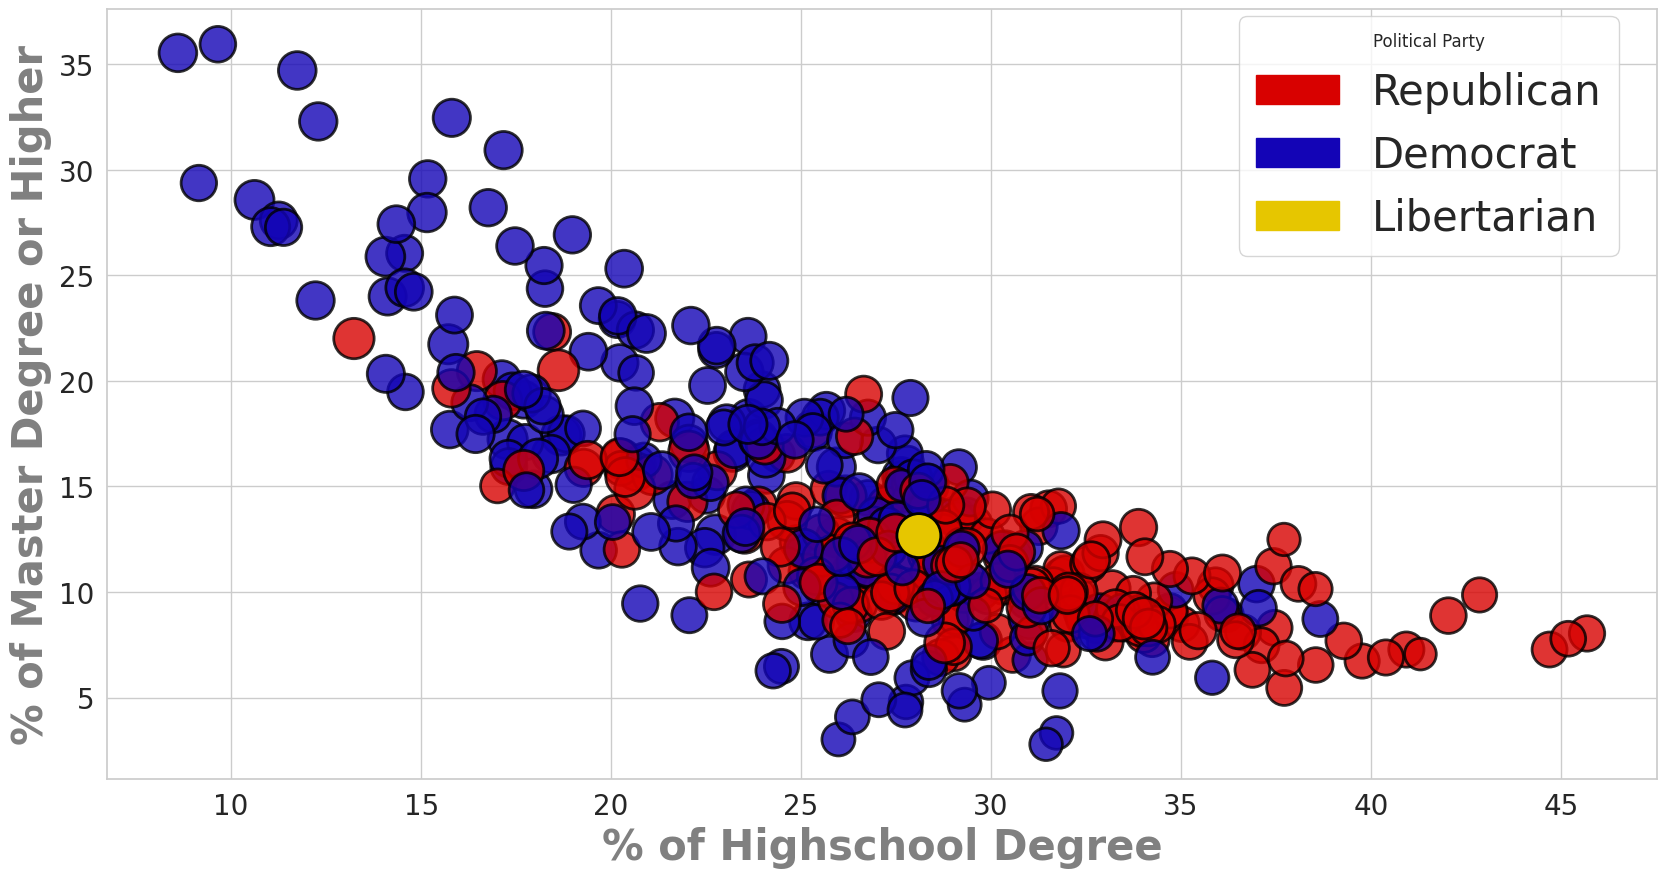

In [ ]:
#Style the seaborn theme
sb.set_theme()
sb.set_style('whitegrid')
colors = ["#D80100", "#1304B6", "#E6C600"]
plt.tick_params(axis='x', labelsize='20')
plt.tick_params(axis='y', labelsize='20')
sb.set_palette(sb.color_palette(colors))

#Set notebook's figure size
plt.rcParams['figure.figsize'] = [10, 5]


#Set up bubble plot
graph = sb.scatterplot(data = final_merge,
               x = "% of High School Degree",
               y = "% of Master Degree or Higher",
               size = "Total",
               legend = True,
               alpha = 0.8,
               hue = "Party",
               edgecolor = 'black',
               linewidth = 2,
               sizes = (500, 1000),
               zorder = 3)

plt.scatter(x=libertarian_locate["% of High School Degree"],
            y=libertarian_locate["% of Master Degree or Higher"],
            s=libertarian_locate["Total"],  # Adjust 'scale_factor' as needed
            alpha=1,
            color='#E6C600',  # Choose a specific color to highlight
            edgecolor='black',
            linewidth=2,
            sizes =(1000, 1500),
            zorder=4)  # Ensure this zorder is higher than the main plot

plt.xlabel("% of Highschool Degree",
           fontweight = "bold",
           font = "Sans Serif",
           color = "grey",
           fontsize = '30',
           horizontalalignment='center')

plt.ylabel("% of Master Degree or Higher",
           fontweight = "bold",
           font = "Sans Serif",
           color = "grey",
           fontsize = '30',
           verticalalignment='center',
           labelpad = 20)

#Create a custom Legend
# Define legend elements
red_patch = mpatches.Patch(color='#D80100', label='Republican')
blue_patch = mpatches.Patch(color='#1304B6', label='Democrat')
gold_patch = mpatches.Patch(color='#E6C600', label='Libertarian')

# Add legend to plot
plt.legend(handles=[red_patch, blue_patch, gold_patch], title="Political Party", loc=(0.73, 0.68), fontsize=(30))

#Further analysis

Question to ask ourselves:

Is there a strong positive correlation between those pursuing a master's degree or higher education, and the democratic party.  Or is it just this groups' inate ability that allow for their credentials, and the relationship between democrats is simply a coincidence.

This type of question is referred to as endogeniety testing, and can be further pursued by building a model to predict what kind of people are more likely to pursue higher education based on factors like ethnicity, gender, access to public education, socioeconomic status, etc.

